In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('/Users/evanfrench/Desktop/python_revisited/Stock_Price_Data/AAPL.csv')

In [57]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/11/16,26.780001,27.217501,26.637501,27.107500,25.591320,136575600
1,11/14/16,26.927500,26.952499,26.020000,26.427500,24.949354,204702000
2,11/15/16,26.642500,26.920000,26.540001,26.777500,25.279776,129058000
3,11/16/16,26.674999,27.557501,26.650000,27.497499,25.959503,235362000
4,11/17/16,27.452499,27.587500,27.207500,27.487499,25.950066,110528000


In [58]:
data.drop(['Open', 'High', 'Low', 'Close', 'Volume'],axis=1,inplace=True)
data['SMA'] = data['Adj Close'].rolling(window=20).mean()
data['STD'] = data['Adj Close'].rolling(window=20).std()
data.dropna(inplace=True)

In [59]:
data.reset_index(inplace=True,drop=True)
data.head()

,Date,Adj Close,SMA,STD
0,12/9/16,26.894136,26.043293,0.436157
1,12/12/16,26.740721,26.100763,0.449005
2,12/13/16,27.186798,26.212636,0.425127
3,12/14/16,27.186798,26.307987,0.418698
4,12/15/16,27.335484,26.376786,0.468508


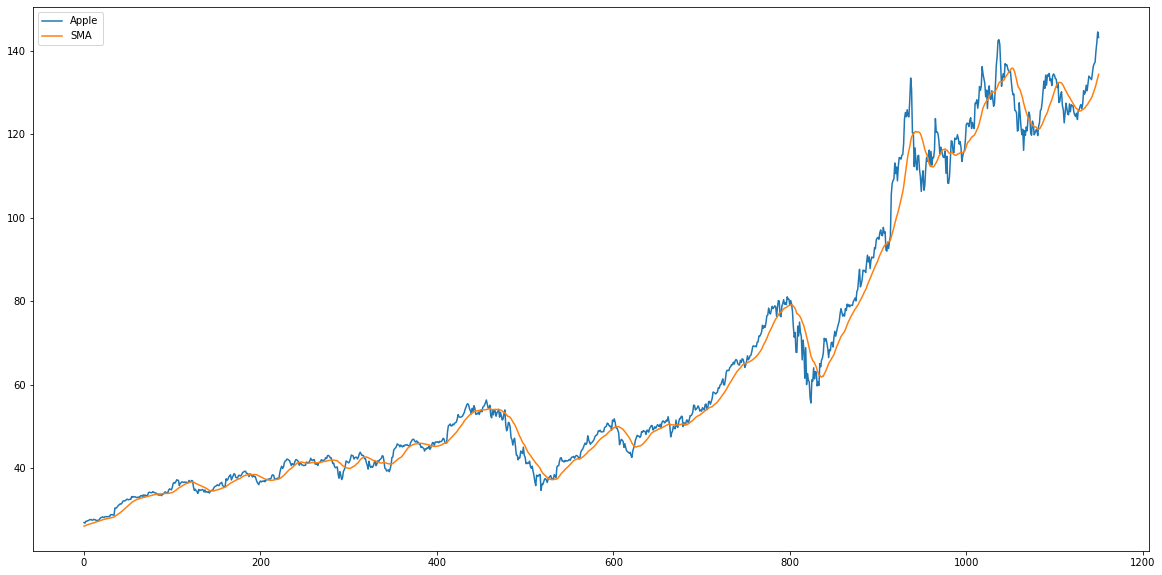

In [60]:
plt.figure(figsize=(20,10))
plt.plot(data['Adj Close'],label='Apple')
plt.plot(data['SMA'],label='SMA')
plt.legend(loc='upper left')
plt.show();

In [61]:
def buy_sell(data):
    
    buy_list = []
    sell_list = []
    
    flag = 0
    
    for day in range(len(data)):
        
        # Adj close is above the MA
        if data['Adj Close'][day] > data['SMA'][day]:
            # We have no position and need to purchase
            if flag == 0:
                buy_list.append(data['Adj Close'][day])
                sell_list.append(np.nan)
                flag = 1
            
            # We already have a position and need to pass
            elif flag == 1:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
                
        # Adj close is above the MA
        elif data['Adj Close'][day] < data['SMA'][day]:
            # We have a position and need to sell
            if flag == 1:
                sell_list.append(data['Adj Close'][day]) 
                buy_list.append(np.nan)
                flag = 0
            
            # We have no position and need to pass
            elif flag == 0:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list,sell_list)

In [62]:
buy_sell = buy_sell(data)

In [63]:
data['Buy'] = buy_sell[0]
data['Sell'] = buy_sell[1]

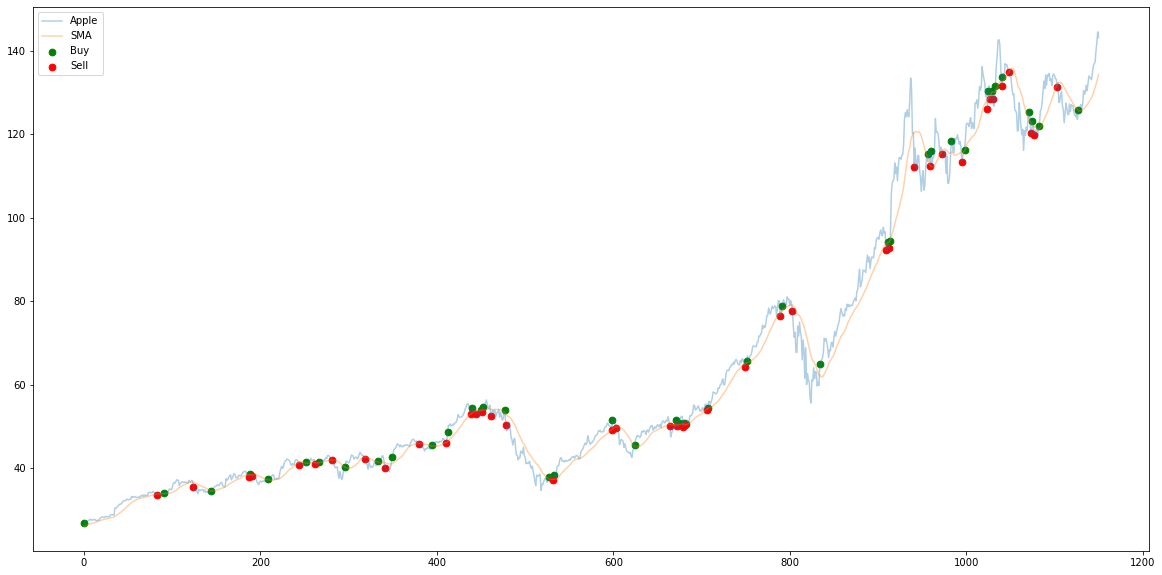

In [64]:
plt.figure(figsize=(20,10))

plt.plot(data['Adj Close'],label='Apple',alpha=.35)
plt.plot(data['SMA'],label='SMA',alpha=.35)

plt.scatter(x=data.index,y=data['Buy'],label='Buy',c='g',marker='o',s=45)
plt.scatter(x=data.index,y=data['Sell'],label='Sell',c='r',marker='o',s=45)

plt.legend(loc='upper left')
plt.show();

In [66]:
data['Upper Band'] = data['SMA'] + (data['STD'] * 2)
data['Lower Band'] = data['SMA'] - (data['STD'] * 2)

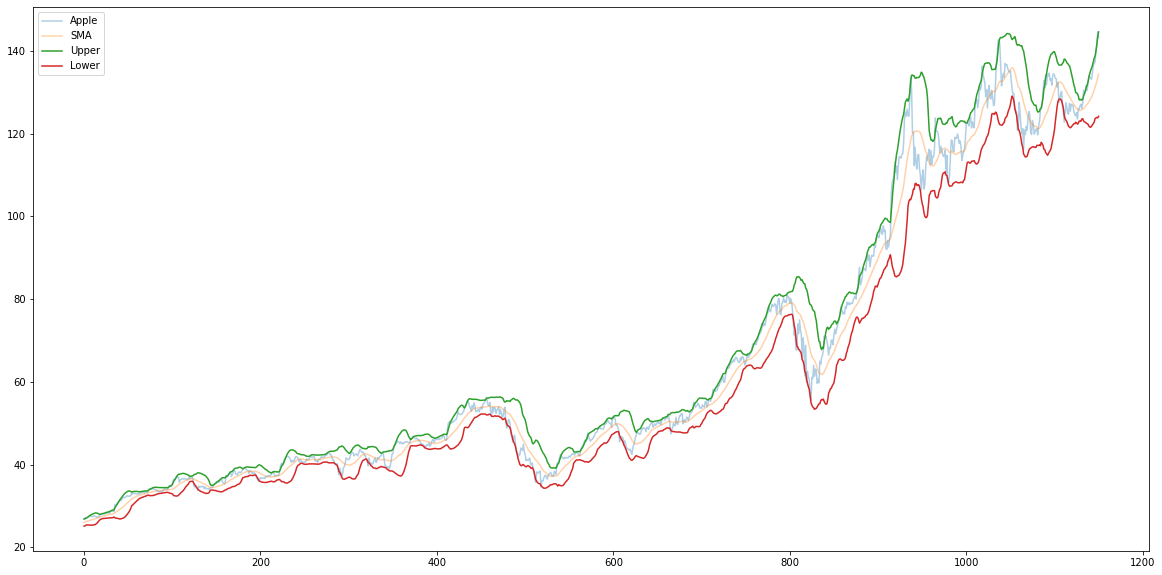

In [67]:
plt.figure(figsize=(20,10))

plt.plot(data['Adj Close'],label='Apple',alpha=.35)
plt.plot(data['SMA'],label='SMA',alpha=.35)

plt.plot(data['Upper Band'],label='Upper')
plt.plot(data['Lower Band'],label='Lower')

plt.legend(loc='upper left')
plt.show();

In [68]:
data.head()

,Date,Adj Close,SMA,STD,Buy,Sell,Upper Band,Lower Band
0,12/9/16,26.894136,26.043293,0.436157,26.894136,NaN,26.915608,25.170979
1,12/12/16,26.740721,26.100763,0.449005,NaN,NaN,26.998773,25.202754
2,12/13/16,27.186798,26.212636,0.425127,NaN,NaN,27.062889,25.362382
3,12/14/16,27.186798,26.307987,0.418698,NaN,NaN,27.145382,25.470591
4,12/15/16,27.335484,26.376786,0.468508,NaN,NaN,27.313801,25.439770


In [71]:
# Buys and sells

def bollinger_band(data):
    buy_list = []
    sell_list = []
    
    flag = 0
    
    for day in range(len(data)):
    
        # Scenerio 1: We have no position and the price is more than the upper band - Short positon
        if flag == 0 and data['Adj Close'][day] > data['Upper Band'][day]:
            buy_list.append(np.nan)
            sell_list.append(data['Adj Close'][day])
            flag = -1
            
        # Scenerio 2: We have no position and the band reaches the lower band - Take a long position
        
        elif flag == 0 and data['Adj Close'][day] < data['Lower Band'][day]:
            buy_list.append(data['Adj Close'][day])
            sell_list.append(np.nan)
            flag = 1
        
        # Scenerio 3: We have an existing long position and need to flatten it when the price gets back to the SMA
        
        elif flag == 1 and data['Adj Close'][day] >= data['SMA'][day]:
            buy_list.append(np.nan)    
            sell_list.append(data['Adj Close'][day])      
            flag = 0
            
        # Scenerio 4: We have an existing short position and need to flatten it when the price gets back to the SMA
        elif flag == -1 and data['Adj Close'][day] <= data['SMA'][day]:
            buy_list.append(data['Adj Close'][day])
            sell_list.append(np.nan)
            flag = 0
            
        else:
            
            buy_list.append(np.nan) 
            sell_list.append(np.nan)
            
    return (buy_list,sell_list)

In [72]:
buy_sell = bollinger_band(data)
data['Buy'] = buy_sell[0]
data['Sell'] = buy_sell[1]

In [73]:
data.head()

,Date,Adj Close,SMA,STD,Buy,Sell,Upper Band,Lower Band
0,12/9/16,26.894136,26.043293,0.436157,NaN,NaN,26.915608,25.170979
1,12/12/16,26.740721,26.100763,0.449005,NaN,NaN,26.998773,25.202754
2,12/13/16,27.186798,26.212636,0.425127,NaN,27.186798,27.062889,25.362382
3,12/14/16,27.186798,26.307987,0.418698,NaN,NaN,27.145382,25.470591
4,12/15/16,27.335484,26.376786,0.468508,NaN,NaN,27.313801,25.439770


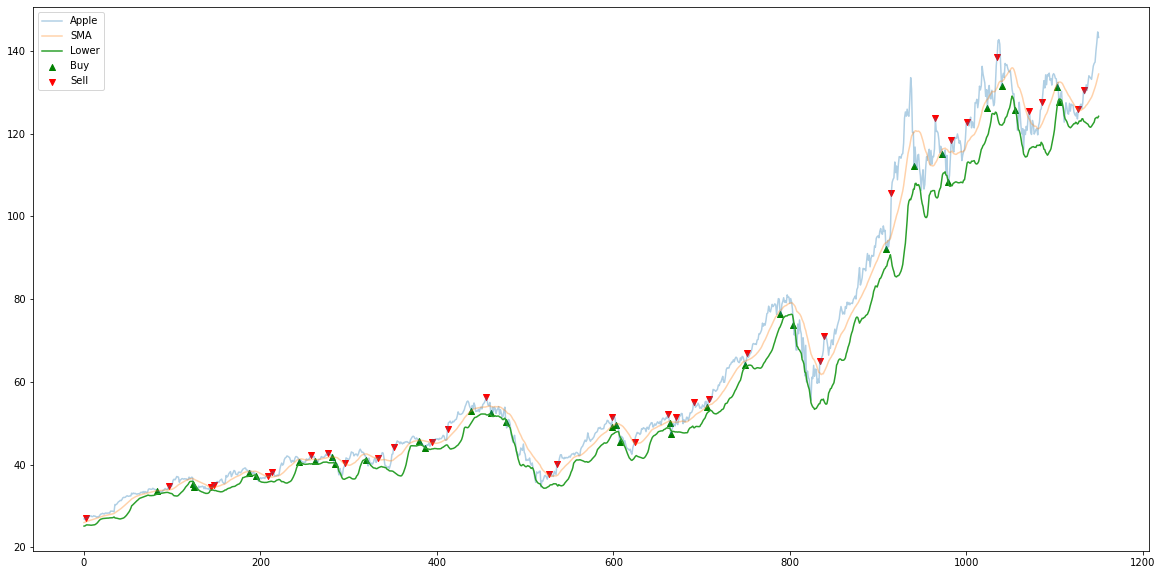

In [78]:
plt.figure(figsize=(20,10))

plt.plot(data['Adj Close'],label='Apple',alpha=.35)
plt.plot(data['SMA'],label='SMA',alpha=.35)

#plt.plot(data['Upper Band'],label='Upper')
plt.plot(data['Lower Band'],label='Lower')

plt.scatter(x=data.index, y=data['Buy'],label='Buy',marker='^',c='g')
plt.scatter(x=data.index, y=data['Sell'],label='Sell',marker='v',c='r')

plt.legend(loc='upper left')
plt.show();

In [79]:
# Buys only 


def bollinger_band_buy(data):
    buy_list = []
    sell_list = []
    
    flag = 0
    
    for day in range(len(data)):
    
        # Scenerio 1: We have no position and the band reaches the lower band - Take a long position
        
        if flag == 0 and data['Adj Close'][day] < data['Lower Band'][day]:
            buy_list.append(data['Adj Close'][day])
            sell_list.append(np.nan)
            flag = 1
        
        # Scenerio 2: We have an existing long position and need to flatten it when the price gets back to the SMA
        
        elif flag == 1 and data['Adj Close'][day] >= data['SMA'][day]:
            buy_list.append(np.nan)    
            sell_list.append(data['Adj Close'][day])      
            flag = 0
            
        # Scenerio 3: We have no position and need to do nothing
            
        else:
            buy_list.append(np.nan) 
            sell_list.append(np.nan)
            
    return (buy_list,sell_list)

In [80]:
buy_sell = bollinger_band_buy(data)
data['Buy'] = buy_sell[0]
data['Sell'] = buy_sell[1]

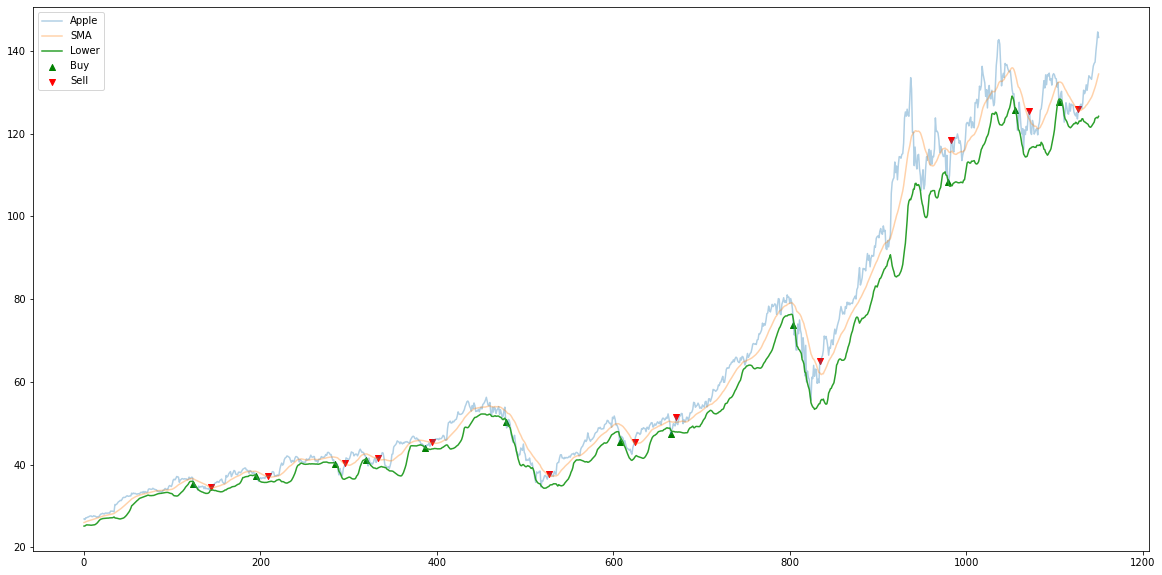

In [83]:
plt.figure(figsize=(20,10))

plt.plot(data['Adj Close'],label='Apple',alpha=.35)
plt.plot(data['SMA'],label='SMA',alpha=.35)

#plt.plot(data['Upper Band'],label='Upper')
plt.plot(data['Lower Band'],label='Lower')

plt.scatter(x=data.index, y=data['Buy'],label='Buy',marker='^',c='g')
plt.scatter(x=data.index, y=data['Sell'],label='Sell',marker='v',c='r')

plt.legend(loc='upper left')
plt.show();